In [261]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
import math
import seaborn as sns
import pickle

In [2]:
raw_2019 = pd.read_csv("./survey_results_public_2019.csv")

In [3]:
raw_2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [4]:
raw_2019['DevType'].head(20)

0                                                   NaN
1     Developer, desktop or enterprise applications;...
2     Designer;Developer, back-end;Developer, front-...
3                                 Developer, full-stack
4     Academic researcher;Developer, desktop or ente...
5     Data or business analyst;Data scientist or mac...
6                         Designer;Developer, front-end
7        Developer, back-end;Engineer, site reliability
8     Database administrator;Developer, back-end;Dev...
9     Data or business analyst;Data scientist or mac...
10                                                  NaN
11    Data or business analyst;Data scientist or mac...
12    Data or business analyst;Database administrato...
13        Developer, desktop or enterprise applications
14                                              Student
15                                Developer, full-stack
16    Developer, back-end;Developer, front-end;Devel...
17                             Data or business 

In [5]:
languages = raw_2019[['Respondent', 'LanguageWorkedWith']]

In [6]:
b = languages['LanguageWorkedWith'].str.split(';', expand=True)

In [7]:
l = []
for i in range(28):
    for j in b[i].unique():
        l.append(j)

In [8]:
all_lang = list(dict.fromkeys(l))

In [9]:
df_2019 = raw_2019[['Respondent', 'Employment', 'EdLevel', 'UndergradMajor', 'OrgSize','DevType', 'YearsCode', 'YearsCodePro', 'ConvertedComp', 'Age', 'Gender', 'Country']]

In [10]:
df_2019.head()

,Respondent,Employment,EdLevel,UndergradMajor,OrgSize,DevType,YearsCode,YearsCodePro,ConvertedComp,Age,Gender,Country
0,1,"Not employed, and not looking for work",Primary/elementary school,NaN,NaN,NaN,4,NaN,NaN,14.0,Man,United Kingdom
1,2,"Not employed, but looking for work","Secondary school (e.g. American high school, G...",NaN,NaN,"Developer, desktop or enterprise applications;...",NaN,NaN,NaN,19.0,Man,Bosnia and Herzegovina
2,3,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,1,8820.0,28.0,Man,Thailand
3,4,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,"Developer, full-stack",3,Less than 1 year,61000.0,22.0,Man,United States
4,5,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees","Academic researcher;Developer, desktop or ente...",16,9,NaN,30.0,Man,Ukraine


In [11]:
df_2019.shape

(88883, 12)

In [12]:
df_2019 = df_2019[~df_2019['ConvertedComp'].isna()]

In [13]:
avg_by_country = df_2019.groupby(by=['Country'])['ConvertedComp'].mean()

In [14]:
df_2019 = df_2019.merge(avg_by_country, left_on='Country', right_index=True, how='left').rename(columns={'ConvertedComp_x':'ConvertedComp', 'ConvertedComp_y':'CountryAvgComp'})

In [15]:
avg_by_ed_lvl = df_2019.groupby(by=['EdLevel'])['ConvertedComp'].mean()

In [16]:
df_2019 = df_2019.merge(avg_by_ed_lvl, left_on='EdLevel', right_index=True, how='left').rename(columns={'ConvertedComp_x':'ConvertedComp', 'ConvertedComp_y':'EducationAvgComp'})

In [17]:
avg_by_major = df_2019.groupby(by=['UndergradMajor'])['ConvertedComp'].mean()

In [18]:
df_2019 = df_2019.merge(avg_by_major, left_on='UndergradMajor', right_index=True, how='left').rename(columns={'ConvertedComp_x':'ConvertedComp', 'ConvertedComp_y':'MajorAvgComp'})

In [19]:
df_2019.groupby(by=['Gender']).count()

,Respondent,Employment,EdLevel,UndergradMajor,OrgSize,DevType,YearsCode,YearsCodePro,ConvertedComp,Age,Country,CountryAvgComp,EducationAvgComp,MajorAvgComp
Gender,,,,,,,,,,,,,,
Man,50503,50387,49787,46367,49671,49872,50441,50377,50503,48735,50503,50503,49787,46367
"Man;Non-binary, genderqueer, or gender non-conforming",115,115,111,112,113,114,115,115,115,113,115,115,111,112
"Non-binary, genderqueer, or gender non-conforming",342,341,334,300,333,335,339,338,342,318,342,342,334,300
Woman,3762,3754,3701,3500,3660,3703,3759,3747,3762,3642,3762,3762,3701,3500
Woman;Man,40,40,39,35,40,39,40,40,40,35,40,40,39,35
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",25,24,22,16,24,24,22,22,25,22,25,25,22,16
"Woman;Non-binary, genderqueer, or gender non-conforming",106,106,106,88,103,105,104,106,106,105,106,106,106,88


In [20]:
df_2019['Gender'] = df_2019['Gender'].fillna('Not Specified')

In [21]:
le = preprocessing.LabelEncoder()
le.fit(list(df_2019['Gender'].unique()))

LabelEncoder()

In [22]:
df_2019['GenderCode'] = le.transform(df_2019['Gender'])

In [23]:
df_2019.loc[df_2019['OrgSize']=='1,000 to 4,999 employees', 'NewOrgSize'] = 3000
df_2019.loc[df_2019['OrgSize']=='10 to 19 employees', 'NewOrgSize'] = 15
df_2019.loc[df_2019['OrgSize']=='10,000 or more employees', 'NewOrgSize'] = 10000
df_2019.loc[df_2019['OrgSize']=='100 to 499 employees', 'NewOrgSize'] = 300
df_2019.loc[df_2019['OrgSize']=='2-9 employees', 'NewOrgSize'] = 5
df_2019.loc[df_2019['OrgSize']=='20 to 99 employees', 'NewOrgSize'] = 60
df_2019.loc[df_2019['OrgSize']=='5,000 to 9,999 employees', 'NewOrgSize'] = 7500
df_2019.loc[df_2019['OrgSize']=='500 to 999 employees', 'NewOrgSize'] = 750
df_2019.loc[df_2019['OrgSize']=='Just me - I am a freelancer, sole proprietor, etc.', 'NewOrgSize'] = 1

In [24]:
orgSizeMean = df_2019['NewOrgSize'].mean()

In [25]:
df_2019['NewOrgSize'] = df_2019['NewOrgSize'].fillna(value=orgSizeMean)

In [26]:
avgComp = df_2019['ConvertedComp'].mean()

In [27]:
df_2019['EducationAvgComp'] = df_2019['EducationAvgComp'].fillna(value=avgComp)

In [28]:
df_2019['MajorAvgComp'] = df_2019['MajorAvgComp'].fillna(value=avgComp)

In [29]:
df_2019 = df_2019.reset_index().drop('index', axis=1)

In [30]:
temp1 = df_2019['DevType'].str.split(';', expand=True)

In [31]:
temp1.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Designer,"Developer, back-end","Developer, front-end","Developer, full-stack",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"Developer, full-stack",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Data or business analyst,Data scientist or machine learning specialist,Database administrator,"Engineer, data",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Database administrator,"Developer, back-end","Developer, front-end","Developer, full-stack","Developer, QA or test",DevOps specialist,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Data or business analyst,Data scientist or machine learning specialist,Database administrator,"Developer, back-end","Developer, desktop or enterprise applications","Developer, front-end","Developer, full-stack","Developer, game or graphics",Educator,None,...,None,None,None,None,None,None,None,None,None,None


In [32]:
temp1.shape

(55823, 24)

In [33]:
all_positions = []
for row in range(temp1.shape[0]):
    j = temp1.iloc[row].as_matrix()
    for position in j:
        if position not in all_positions:
            all_positions.append(position)

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
all_positions.remove(None)

In [35]:
all_positions.pop(-2)

nan

In [36]:
all_positions.sort()

In [37]:
all_positions

['Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'Scientist',
 'Senior executive/VP',
 'Student',
 'System administrator']

In [38]:
for i in all_positions:
    df_2019[i] = 0

In [41]:
len(all_positions)

24

In [42]:
for i in range(temp1.shape[0]):
    j = list(temp1.iloc[i].as_matrix())
    for item in j:
        if type(item)==type('str'):
            df_2019.at[i, item] = 1

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [43]:
df_2019[all_positions].head(20)

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,1,0,1,1,0,...,0,1,1,1,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_2019 = df_2019.drop(['DevType', 'YearsCodePro'], axis=1)


In [45]:
df_2019.columns

Index(['Respondent', 'Employment', 'EdLevel', 'UndergradMajor', 'OrgSize',
       'YearsCode', 'ConvertedComp', 'Age', 'Gender', 'Country',
       'CountryAvgComp', 'EducationAvgComp', 'MajorAvgComp', 'GenderCode',
       'NewOrgSize', 'Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Product manager', 'Scientist',
       'Senior executive/VP', 'Student', 'System administrator'],
      dtype='object')

In [46]:
raw_2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [47]:
df_2019 = df_2019.merge(raw_2019[['Respondent', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith']], on='Respondent', how='left')

In [48]:
temp2 = df_2019['LanguageWorkedWith'].str.split(';', expand=True)

In [49]:
all_languages = []
for row in range(temp2.shape[0]):
    j = temp2.iloc[row].as_matrix()
    for language in j:
        if language not in all_languages:
            all_languages.append(language)

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
all_languages.remove(None)

In [51]:
all_languages.pop(-10)

nan

In [52]:
all_languages.sort()

In [305]:
all_languages

['Assembly',
 'Bash/Shell/PowerShell',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Dart',
 'Elixir',
 'Erlang',
 'F#',
 'Go',
 'HTML/CSS',
 'Java',
 'JavaScript',
 'Kotlin',
 'Objective-C',
 'Other(s):',
 'PHP',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VBA',
 'WebAssembly']

In [53]:
for i in all_languages:
    df_2019[i] = 0

In [54]:
temp2.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,HTML/CSS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,C,C++,C#,Python,SQL,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Java,R,SQL,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Bash/Shell/PowerShell,C#,HTML/CSS,JavaScript,Python,Ruby,Rust,SQL,TypeScript,WebAssembly,...,None,None,None,None,None,None,None,None,None,None
4,C#,Go,JavaScript,Python,R,SQL,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [55]:
for i in range(temp2.shape[0]):
    j = list(temp2.iloc[i].as_matrix())
    for item in j:
        if type(item)==type('str'):
            df_2019.at[i, item] = 1

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [56]:
df_2019[~df_2019['Python'].isna()][all_languages]

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Clojure,Dart,Elixir,Erlang,F#,...,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,WebAssembly
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,1,0,1,1,1,0,0,1,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
55819,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
55820,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
55821,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
df_2019.columns

Index(['Respondent', 'Employment', 'EdLevel', 'UndergradMajor', 'OrgSize',
       'YearsCode', 'ConvertedComp', 'Age', 'Gender', 'Country',
       'CountryAvgComp', 'EducationAvgComp', 'MajorAvgComp', 'GenderCode',
       'NewOrgSize', 'Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Product manager', 'Scientist',
       'Senior executive/VP', 'Student', 'System administrator',
       'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith',
       'W

In [58]:
temp3 = df_2019['DatabaseWorkedWith'].str.split(';', expand=True)

all_DBs = []
for row in range(temp3.shape[0]):
    j = temp3.iloc[row].as_matrix()
    for db in j:
        if db not in all_DBs:
            all_DBs.append(db)

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [59]:
for i in all_DBs:
    print(type(i)==type('str'))

True
False
True
True
True
True
True
True
True
True
False
True
True
True
True
True


In [60]:
all_DBs.remove(None)

In [61]:
all_DBs.pop(-6)

nan

In [62]:
all_DBs.sort()

In [306]:
all_DBs

['Cassandra',
 'Couchbase',
 'DynamoDB',
 'Elasticsearch',
 'Firebase',
 'MariaDB',
 'Microsoft SQL Server',
 'MongoDB',
 'MySQL',
 'Oracle',
 'Other(s):',
 'PostgreSQL',
 'Redis',
 'SQLite']

In [63]:
for i in all_DBs:
    df_2019[i] = 0

In [64]:
for i in range(temp3.shape[0]):
    j = list(temp3.iloc[i].as_matrix())
    for item in j:
        if type(item)==type('str'):
            df_2019.at[i, item] = 1

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [65]:
df_2019[df_2019['PostgreSQL']==1]

,Respondent,Employment,EdLevel,UndergradMajor,OrgSize,YearsCode,ConvertedComp,Age,Gender,Country,...,Elasticsearch,Firebase,MariaDB,Microsoft SQL Server,MongoDB,MySQL,Oracle,PostgreSQL,Redis,SQLite
0,3,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,100 to 499 employees,3,8820.0,28.0,Man,Thailand,...,0,0,0,0,0,0,0,1,0,0
2,6,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,NaN,13,366420.0,28.0,Man,Canada,...,0,0,0,0,1,0,0,1,0,0
3,9,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",10 to 19 employees,12,95179.0,23.0,Man,New Zealand,...,0,0,0,0,0,0,0,1,0,1
8,17,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,5,65277.0,29.0,Man,Australia,...,0,0,0,0,1,0,0,1,0,0
19,32,Employed full-time,Associate degree,"Information systems, information technology, o...",100 to 499 employees,3,1100000.0,21.0,Man,United States,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55815,88874,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...","10,000 or more employees",7,2000000.0,26.0,Man,United States,...,1,0,0,0,0,0,0,1,0,1
55818,88878,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,12,130000.0,26.0,Man,United States,...,0,0,0,0,0,0,0,1,0,0
55820,88881,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,18,68745.0,37.0,Man,Austria,...,0,0,0,0,0,0,0,1,1,0
55821,88882,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,10,588012.0,NaN,Man,Netherlands,...,0,0,1,0,0,0,0,1,0,0


In [66]:
df_2019

,Respondent,Employment,EdLevel,UndergradMajor,OrgSize,YearsCode,ConvertedComp,Age,Gender,Country,...,Elasticsearch,Firebase,MariaDB,Microsoft SQL Server,MongoDB,MySQL,Oracle,PostgreSQL,Redis,SQLite
0,3,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,100 to 499 employees,3,8820.0,28.0,Man,Thailand,...,0,0,0,0,0,0,0,1,0,0
1,4,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,3,61000.0,22.0,Man,United States,...,0,0,0,0,0,1,0,0,0,1
2,6,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,NaN,13,366420.0,28.0,Man,Canada,...,0,0,0,0,1,0,0,1,0,0
3,9,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",10 to 19 employees,12,95179.0,23.0,Man,New Zealand,...,0,0,0,0,0,0,0,1,0,1
4,10,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,"10,000 or more employees",12,13293.0,NaN,Not Specified,India,...,1,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55818,88878,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,12,130000.0,26.0,Man,United States,...,0,0,0,0,0,0,0,1,0,0
55819,88879,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,17,82488.0,34.0,Man,Finland,...,0,0,0,0,0,0,0,0,0,0
55820,88881,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,18,68745.0,37.0,Man,Austria,...,0,0,0,0,0,0,0,1,1,0
55821,88882,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,10,588012.0,NaN,Man,Netherlands,...,0,0,1,0,0,0,0,1,0,0


In [67]:
temp4 = df_2019['PlatformWorkedWith'].str.split(';', expand=True)

all_plats = []
for row in range(temp4.shape[0]):
    j = temp4.iloc[row].as_matrix()
    for plat in j:
        if plat not in all_plats:
            all_plats.append(plat)

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [68]:
for i in all_plats:
    print(type(i)==type('str'))

False
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [69]:
all_plats.remove(None)

In [70]:
all_plats.pop(0)

nan

In [307]:
all_plats

['Linux',
 'Windows',
 'Android',
 'Google Cloud Platform',
 'AWS',
 'Docker',
 'Heroku',
 'MacOS',
 'Slack',
 'IBM Cloud or Watson',
 'iOS',
 'Microsoft Azure',
 'WordPress',
 'Arduino',
 'Raspberry Pi',
 'Kubernetes',
 'Other(s):']

In [71]:
for i in all_plats:
    df_2019[i] = 0

In [72]:
for i in range(temp4.shape[0]):
    j = list(temp4.iloc[i].as_matrix())
    for item in j:
        if type(item)==type('str'):
            df_2019.at[i, item] = 1

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [73]:
temp5 = df_2019['WebFrameWorkedWith'].str.split(';', expand=True)

all_frames = []
for row in range(temp5.shape[0]):
    j = temp5.iloc[row].as_matrix()
    for frame in j:
        if frame not in all_frames:
            all_frames.append(frame)

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [74]:
for i in all_frames:
    print(type(i)==type('str'))

False
True
True
True
False
True
True
True
True
True
True
True
True
True
True


In [75]:
all_frames.remove(None)

In [76]:
all_frames.pop(0)

nan

In [308]:
all_frames

['Express',
 'Ruby on Rails',
 'Other(s):',
 'Angular/Angular.js',
 'ASP.NET',
 'Django',
 'Flask',
 'jQuery',
 'Vue.js',
 'Spring',
 'React.js',
 'Laravel',
 'Drupal']

In [77]:
for i in all_frames:
    df_2019[i] = 0

In [78]:
for i in range(temp5.shape[0]):
    j = list(temp5.iloc[i].as_matrix())
    for item in j:
        if type(item)==type('str'):
            df_2019.at[i, item] = 1

/Users/owenbchiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [79]:
df_2019[df_2019['React.js']==1].head()

,Respondent,Employment,EdLevel,UndergradMajor,OrgSize,YearsCode,ConvertedComp,Age,Gender,Country,...,Angular/Angular.js,ASP.NET,Django,Flask,jQuery,Vue.js,Spring,React.js,Laravel,Drupal
10,19,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",100 to 499 employees,14,31140.0,31.0,Man,Brazil,...,1,1,0,0,1,0,0,1,0,0
13,23,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...","10,000 or more employees",3,69000.0,22.0,Man,United States,...,0,0,0,0,0,0,0,1,0,0
14,24,Employed full-time,Primary/elementary school,NaN,10 to 19 employees,2,26388.0,23.0,Man,Israel,...,0,0,0,0,1,0,0,1,0,0
17,29,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,"10,000 or more employees",4,100000.0,32.0,Man,United States,...,0,0,0,0,1,0,0,1,0,0
33,54,Employed full-time,NaN,"Computer science, computer engineering, or sof...",20 to 99 employees,20,68268.0,37.0,Man,Sweden,...,0,0,1,0,0,0,0,1,0,0


In [80]:
for i in df_2019.columns:
    print(i)

Respondent
Employment
EdLevel
UndergradMajor
OrgSize
YearsCode
ConvertedComp
Age
Gender
Country
CountryAvgComp
EducationAvgComp
MajorAvgComp
GenderCode
NewOrgSize
Academic researcher
Data or business analyst
Data scientist or machine learning specialist
Database administrator
Designer
DevOps specialist
Developer, QA or test
Developer, back-end
Developer, desktop or enterprise applications
Developer, embedded applications or devices
Developer, front-end
Developer, full-stack
Developer, game or graphics
Developer, mobile
Educator
Engineer, data
Engineer, site reliability
Engineering manager
Marketing or sales professional
Product manager
Scientist
Senior executive/VP
Student
System administrator
LanguageWorkedWith
DatabaseWorkedWith
PlatformWorkedWith
WebFrameWorkedWith
Assembly
Bash/Shell/PowerShell
C
C#
C++
Clojure
Dart
Elixir
Erlang
F#
Go
HTML/CSS
Java
JavaScript
Kotlin
Objective-C
Other(s):
PHP
Python
R
Ruby
Rust
SQL
Scala
Swift
TypeScript
VBA
WebAssembly
Cassandra
Couchbase
DynamoDB

In [81]:
df_2019.loc[df_2019['YearsCode']==np.nan, 'YearsCode'] = 0

In [82]:
df_2019['YearsCode'] = df_2019['YearsCode'].fillna(value=0)

In [83]:
df_2019['YearsCode'].unique()

array(['3', '13', '12', '17', '10', '5', '14', '8', '35', '2', '4', '6',
       '30', '9', '26', '40', '15', '7', '20', '28', '25', '1', '22',
       '16', '11', '33', '50', '18', '34', '19', '24', '23', '42', '27',
       '21', '36', 'Less than 1 year', '32', '39', '38', 0, '31', '29',
       '37', '41', '44', '48', '45', '43', '47', '46', '49',
       'More than 50 years'], dtype=object)

In [84]:
df_2019.loc[df_2019['YearsCode']=='Less than 1 year', 'YearsCode'] = 0
df_2019.loc[df_2019['YearsCode']=='More than 50 years', 'YearsCode'] = 50

In [85]:
df_2019['YearsCode'] = df_2019['YearsCode'].astype('int64')

In [86]:
df_2019.loc[df_2019['Age']==np.nan, 'Age'] = 0
df_2019['Age'] = df_2019['Age'].fillna(value=0)

In [87]:
df_2019['Age'] = df_2019['Age'].astype('int64')

In [88]:
df_2019[df_2019['Age']!=0]['Age'].mean()

31.42608338160821

In [89]:
df_2019.loc[df_2019['Age']==0, 'Age'] = 31

In [274]:
df_2019 = df_2019[df_2019['ConvertedComp']<1000000]

In [316]:
df_2018 = pd.read_csv('2018_formatted_data.csv')

In [ ]:
df_2019 = df_2019[df_2019['Country']!='']

In [317]:
X = df_2019.drop(['Respondent', 'Employment', 'EdLevel', 'UndergradMajor', 'OrgSize', 'Gender', 'Country', 'ConvertedComp', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith'], axis=1)


In [318]:
X = X.drop(['Age', 'NewOrgSize','GenderCode', 'MajorAvgComp','Marketing or sales professional', 'Drupal', 'IBM Cloud or Watson', 'WebAssembly', 'Couchbase', 'F#', 'Erlang', 'Elixir', 'Dart', 'Clojure'], axis=1)


In [319]:
X = pd.concat([X, df_2018[X.columns]])

In [320]:
y = pd.concat([df_2019['ConvertedComp'], df_2018['ConvertedComp']])

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [328]:
lm = linear_model.LinearRegression()

In [329]:
model = lm.fit(X,y)

In [324]:
y_pred = lm.predict(X_test)

In [325]:
y_pred = abs(y_pred)

In [326]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
R2 = metrics.r2_score(y_test, y_pred)

In [108]:
#Baseline - All Features, no Hyperparameters
print("Mean Abs Error:", MAE)
print("Mean Squared Error:", MSE)
print("R2:", R2)

Mean Abs Error: 119590.11219623643
Mean Squared Error: 72707776706.6328
R2: 0.1002219359074934


In [327]:
print("Mean Abs Error:", MAE)
print("Mean Squared Error:", MSE)
print("R2:", R2)

Mean Abs Error: 45773.713510622954
Mean Squared Error: 11340788906.778673
R2: 0.12592263345589205


In [285]:
math.sqrt(MSE)

113505.41763002942

In [287]:
results = pd.concat([y_test.reset_index()['ConvertedComp'], pd.Series(y_pred)], axis=1)

In [288]:
results = results.rename(columns={'ConvertedComp': 'Actual', 0:'Predicted'})

In [290]:
results['Diff'] = abs(results['Actual']-results['Predicted'])

In [295]:
results = results.sort_values(by=['Predicted'], ascending=False)

In [296]:
results.head()

,Actual,Predicted,Diff
5717,260000.0,230707.118083,29292.881917
11046,275000.0,228345.162907,46654.837093
907,212500.0,223282.184551,10782.184551
10004,200000.0,222938.490722,22938.490722
16136,225000.0,222565.262269,2434.737731


In [298]:
test4 = {
  "YearsCode": 10,
  "CountryAvgComp": 28057.664916,
  "EducationAvgComp": 134966.131508,
  "Academic researcher": 1,
  "Data or business analyst": 1,
  "Data scientist or machine learning specialist": 0,
  "Database administrator": 0,
  "Designer": 1,
  "DevOps specialist": 1,
  "Developer, QA or test": 1,
  "Developer, back-end": 1,
  "Developer, desktop or enterprise applications": 0,
  "Developer, embedded applications or devices": 1,
  "Developer, front-end": 0,
  "Developer, full-stack": 1,
  "Developer, game or graphics": 0,
  "Developer, mobile": 0,
  "Educator": 0,
  "Engineer, data": 0,
  "Engineer, site reliability": 0,
  "Engineering manager": 0,
  "Product manager": 0,
  "Scientist": 0,
  "Senior executive/VP": 0,
  "Student": 0,
  "System administrator": 0,
  "Assembly": 1,
  "Bash/Shell/PowerShell": 0,
  "C": 1,
  "C#": 0,
  "C++": 1,
  "Go": 1,
  "HTML/CSS": 0,
  "Java": 0,
  "JavaScript": 1,
  "Kotlin": 0,
  "Objective-C": 0,
  "Other(s):": 0,
  "PHP": 1,
  "Python": 1,
  "R": 1,
  "Ruby": 0,
  "Rust": 0,
  "SQL": 0,
  "Scala": 0,
  "Swift": 1,
  "TypeScript": 1,
  "VBA": 0,
  "Cassandra": 0,
  "DynamoDB": 0,
  "Elasticsearch": 0,
  "Firebase": 1,
  "MariaDB": 1,
  "Microsoft SQL Server": 0,
  "MongoDB": 1,
  "MySQL": 1,
  "Oracle": 1,
  "PostgreSQL": 0,
  "Redis": 0,
  "SQLite": 0,
  "Linux": 1,
  "Windows": 1,
  "Android": 1,
  "Google Cloud Platform": 0,
  "AWS": 0,
  "Docker": 0,
  "Heroku": 0,
  "MacOS": 0,
  "Slack": 0,
  "iOS": 0,
  "Microsoft Azure": 0,
  "WordPress": 0,
  "Arduino": 1,
  "Raspberry Pi": 1,
  "Kubernetes": 0,
  "Express": 0,
  "Ruby on Rails": 0,
  "Angular/Angular.js": 0,
  "ASP.NET": 0,
  "Django": 0,
  "Flask": 1,
  "jQuery": 1,
  "Vue.js": 1,
  "Spring": 1,
  "React.js": 1,
  "Laravel": 0
}
test4_df = pd.DataFrame(test4, index=[0])

lm.predict(test4_df)

array([14331.87438231])

In [299]:
X.columns

Index(['YearsCode', 'CountryAvgComp', 'EducationAvgComp',
       'Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager', 'Product manager',
       'Scientist', 'Senior executive/VP', 'Student', 'System administrator',
       'Assembly', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Go', 'HTML/CSS',
       'Java', 'JavaScript', 'Kotlin', 'Objective-C', 'Other(s):', 'PHP',
       'Python', 'R', 'Ruby', 'Rust', 'SQL', 'Scala', 'Swift', 'TypeScript',
       'VBA', 'Cassandra', 'DynamoDB', 'Elasticsearch', 'Firebas

In [138]:
test2 = {'YearsCode':20, 'Age':40, 'CountryAvgComp':134018.564909, 'EducationAvgComp':154087.31363636,
       'MajorAvgComp':180557.20155902, 'GenderCode':0, 'NewOrgSize':10000, 'Academic researcher':1,
       'Data or business analyst':1,
       'Data scientist or machine learning specialist':1,
       'Database administrator':1, 'Designer':1, 'DevOps specialist':1,
       'Developer, QA or test':1, 'Developer, back-end':1,
       'Developer, desktop or enterprise applications':1,
       'Developer, embedded applications or devices':1, 'Developer, front-end':1,
       'Developer, full-stack':1, 'Developer, game or graphics':1,
       'Developer, mobile':1, 'Educator':1, 'Engineer, data':1,
       'Engineer, site reliability':1, 'Engineering manager':1,
       'Marketing or sales professional':1, 'Product manager':1, 'Scientist':1,
       'Senior executive/VP':1, 'Student':1, 'System administrator':1, 'Assembly':1,
       'Bash/Shell/PowerShell':1, 'C':1, 'C#':1, 'C++':1, 'Clojure':1, 'Dart':1, 'Elixir':1,
       'Erlang':1, 'F#':1, 'Go':1, 'HTML/CSS':1, 'Java':1, 'JavaScript':1, 'Kotlin':1,
       'Objective-C':1, 'Other(s):':1, 'PHP':1, 'Python':1, 'R':1, 'Ruby':1, 'Rust':1, 'SQL':1,
       'Scala':1, 'Swift':1, 'TypeScript':1, 'VBA':1, 'WebAssembly':1, 'Cassandra':1,
       'Couchbase':1, 'DynamoDB':1, 'Elasticsearch':1, 'Firebase':1, 'MariaDB':1,
       'Microsoft SQL Server':1, 'MongoDB':1, 'MySQL':1, 'Oracle':1, 'PostgreSQL':1,
       'Redis':1, 'SQLite':1, 'Linux':1, 'Windows':1, 'Android':1,
       'Google Cloud Platform':1, 'AWS':1, 'Docker':1, 'Heroku':1, 'MacOS':1, 'Slack':1,
       'IBM Cloud or Watson':1, 'iOS':1, 'Microsoft Azure':1, 'WordPress':1, 'Arduino':1,
       'Raspberry Pi':1, 'Kubernetes':1, 'Express':1, 'Ruby on Rails':1,
       'Angular/Angular.js':1, 'ASP.NET':1, 'Django':1, 'Flask':1, 'jQuery':1, 'Vue.js':1,
       'Spring':1, 'React.js':1, 'Laravel':1, 'Drupal':1}

In [139]:
test3 = pd.DataFrame(test2, index=[0])

In [140]:
lm.predict(test3)

array([390970.83524984])

In [297]:
df_2019[df_2019['Country']=='India']['CountryAvgComp']

4        28057.664916
30       28057.664916
44       28057.664916
50       28057.664916
53       28057.664916
             ...     
55713    28057.664916
55727    28057.664916
55753    28057.664916
55774    28057.664916
55781    28057.664916
Name: CountryAvgComp, Length: 3992, dtype: float64

In [141]:
y_pred_series = pd.Series(y_pred)

In [145]:
y_test.reset_index()['ConvertedComp']

0        109000.0
1         41688.0
2         77400.0
3         59652.0
4         62000.0
           ...   
18417     54996.0
18418    130847.0
18419     24576.0
18420    103117.0
18421     54956.0
Name: ConvertedComp, Length: 18422, dtype: float64

In [182]:
results.head(30)

,Actual,Predicted
0,109000.0,282996.099051
1,41688.0,66016.540709
2,77400.0,238533.021570
3,59652.0,83078.629025
4,62000.0,225278.611587
5,10608.0,41212.641112
6,6876.0,-2817.714491
7,91593.0,179932.179814
8,4272.0,-5842.383589
9,17200.0,47935.324338


In [153]:
X.columns

Index(['YearsCode', 'Age', 'CountryAvgComp', 'EducationAvgComp',
       'MajorAvgComp', 'GenderCode', 'NewOrgSize', 'Academic researcher',
       'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Product manager', 'Scientist',
       'Senior executive/VP', 'Student', 'System administrator', 'Assembly',
       'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Clojure', 'Dart', 'Elixir',
       'Erlang', 'F#', 'Go', 'HTML/CSS', 'Java', 'JavaScript', 'Kotlin',
       'Objective-C', 'Other(s)

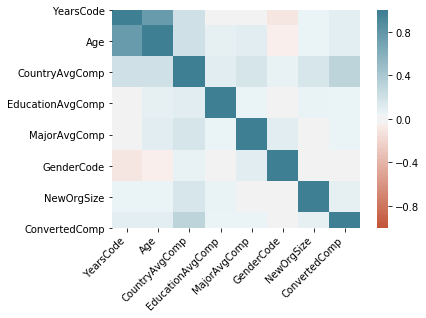

In [155]:
corr = df_2019[['YearsCode', 'Age', 'CountryAvgComp', 'EducationAvgComp',
       'MajorAvgComp', 'GenderCode', 'NewOrgSize', 'ConvertedComp']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [157]:
totals = df_2019[['Academic researcher',
       'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Product manager', 'Scientist',
       'Senior executive/VP', 'Student', 'System administrator', 'Assembly',
       'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Clojure', 'Dart', 'Elixir',
       'Erlang', 'F#', 'Go', 'HTML/CSS', 'Java', 'JavaScript', 'Kotlin',
       'Objective-C', 'Other(s):', 'PHP', 'Python', 'R', 'Ruby', 'Rust', 'SQL',
       'Scala', 'Swift', 'TypeScript', 'VBA', 'WebAssembly', 'Cassandra',
       'Couchbase', 'DynamoDB', 'Elasticsearch', 'Firebase', 'MariaDB',
       'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Oracle', 'PostgreSQL',
       'Redis', 'SQLite', 'Linux', 'Windows', 'Android',
       'Google Cloud Platform', 'AWS', 'Docker', 'Heroku', 'MacOS', 'Slack',
       'IBM Cloud or Watson', 'iOS', 'Microsoft Azure', 'WordPress', 'Arduino',
       'Raspberry Pi', 'Kubernetes', 'Express', 'Ruby on Rails',
       'Angular/Angular.js', 'ASP.NET', 'Django', 'Flask', 'jQuery', 'Vue.js',
       'Spring', 'React.js', 'Laravel', 'Drupal']].sum()

In [169]:
totals[21:41]

Senior executive/VP       1318
Student                   3848
System administrator      5957
Assembly                  2428
Bash/Shell/PowerShell    21832
C                         8851
C#                       18062
C++                      10688
Clojure                    863
Dart                       979
Elixir                     898
Erlang                     515
F#                         648
Go                        5079
HTML/CSS                 35134
Java                     21154
JavaScript               39029
Kotlin                    3689
Objective-C               2838
Other(s):                 3764
dtype: int64

In [185]:
df_2019.groupby(by=['UndergradMajor']).count()

,Respondent,Employment,EdLevel,OrgSize,YearsCode,ConvertedComp,Age,Gender,Country,CountryAvgComp,...,Angular/Angular.js,ASP.NET,Django,Flask,jQuery,Vue.js,Spring,React.js,Laravel,Drupal
UndergradMajor,,,,,,,,,,,,,,,,,,,,,
"A business discipline (ex. accounting, finance, marketing)",1154,1151,1143,1142,1154,1154,1154,1154,1154,1154,...,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154
"A health science (ex. nursing, pharmacy, radiology)",154,154,150,152,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154
"A humanities discipline (ex. literature, history, philosophy)",1138,1138,1130,1117,1138,1138,1138,1138,1138,1138,...,1138,1138,1138,1138,1138,1138,1138,1138,1138,1138
"A natural science (ex. biology, chemistry, physics)",2303,2299,2279,2260,2303,2303,2303,2303,2303,2303,...,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303
"A social science (ex. anthropology, psychology, political science)",962,962,955,949,962,962,962,962,962,962,...,962,962,962,962,962,962,962,962,962,962
"Another engineering discipline (ex. civil, electrical, mechanical)",4204,4188,4181,4141,4204,4204,4204,4204,4204,4204,...,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204
"Computer science, computer engineering, or software engineering",32356,32284,31937,31792,32356,32356,32356,32356,32356,32356,...,32356,32356,32356,32356,32356,32356,32356,32356,32356,32356
"Fine arts or performing arts (ex. graphic design, music, studio art)",898,896,882,878,898,898,898,898,898,898,...,898,898,898,898,898,898,898,898,898,898
I never declared a major,575,575,528,563,575,575,575,575,575,575,...,575,575,575,575,575,575,575,575,575,575


In [212]:
X.columns

Index(['YearsCode', 'CountryAvgComp', 'EducationAvgComp',
       'Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager', 'Product manager',
       'Scientist', 'Senior executive/VP', 'Student', 'System administrator',
       'Assembly', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Go', 'HTML/CSS',
       'Java', 'JavaScript', 'Kotlin', 'Objective-C', 'Other(s):', 'PHP',
       'Python', 'R', 'Ruby', 'Rust', 'SQL', 'Scala', 'Swift', 'TypeScript',
       'VBA', 'Cassandra', 'DynamoDB', 'Elasticsearch', 'Firebas

In [213]:
X.head()

,YearsCode,CountryAvgComp,EducationAvgComp,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test",...,Ruby on Rails,Angular/Angular.js,ASP.NET,Django,Flask,jQuery,Vue.js,Spring,React.js,Laravel
0,3,48379.436893,134966.131508,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,249546.254589,134966.131508,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,134018.564909,134966.131508,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,151681.803922,117587.731065,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
4,12,28057.664916,120712.385650,0,1,1,1,0,0,0,...,0,1,1,1,1,1,0,0,0,0


In [227]:
{
    YearsCode: 0,
    CountryAvgComp: "CA",
    EducationAvgComp: 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
    Jobs...,
    Skills...
}

{}

In [238]:
df_2019['YearsCode'].unique().max()

50

In [243]:
country_map = df_2019[['Country', 'CountryAvgComp']].drop_duplicates()

In [250]:
edu_map = df_2019[['EdLevel', 'EducationAvgComp']].drop_duplicates()

In [265]:
edu_map.to_csv('edu_map.csv')

In [266]:
country_map.to_csv('country_map.csv')

In [330]:
filename = 'linear_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [269]:
X.sample(1).to_dict('list')

{'YearsCode': [12],
 'CountryAvgComp': [81214.77972238987],
 'EducationAvgComp': [120712.38565022421],
 'Academic researcher': [0],
 'Data or business analyst': [0],
 'Data scientist or machine learning specialist': [0],
 'Database administrator': [0],
 'Designer': [0],
 'DevOps specialist': [0],
 'Developer, QA or test': [0],
 'Developer, back-end': [0],
 'Developer, desktop or enterprise applications': [0],
 'Developer, embedded applications or devices': [1],
 'Developer, front-end': [0],
 'Developer, full-stack': [0],
 'Developer, game or graphics': [0],
 'Developer, mobile': [0],
 'Educator': [0],
 'Engineer, data': [0],
 'Engineer, site reliability': [0],
 'Engineering manager': [0],
 'Product manager': [0],
 'Scientist': [0],
 'Senior executive/VP': [0],
 'Student': [0],
 'System administrator': [0],
 'Assembly': [1],
 'Bash/Shell/PowerShell': [0],
 'C': [1],
 'C#': [0],
 'C++': [1],
 'Go': [1],
 'HTML/CSS': [0],
 'Java': [0],
 'JavaScript': [0],
 'Kotlin': [0],
 'Objective-C': [

In [270]:
edu_map

,EdLevel,EducationAvgComp
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",134966.131508
3,Some college/university study without earning ...,117587.731065
4,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",120712.385650
6,"Other doctoral degree (Ph.D, Ed.D., etc.)",171504.379046
14,Primary/elementary school,95072.546154
15,Associate degree,146191.275269
22,"Secondary school (e.g. American high school, G...",85330.023734
33,NaN,127110.738423
45,"Professional degree (JD, MD, etc.)",86490.193289
94,I never completed any formal education,154087.313636


In [271]:
country_map

,Country,CountryAvgComp
0,Thailand,48379.436893
1,United States,249546.254589
2,Canada,134018.564909
3,New Zealand,151681.803922
4,India,28057.664916
...,...,...
43930,Seychelles,61308.000000
44142,Malawi,11532.000000
49696,Democratic People's Republic of Korea,32880.000000
51153,Chad,6288.000000


In [300]:
df_2019[df_2019['ConvertedComp']>600000]

,Respondent,Employment,EdLevel,UndergradMajor,OrgSize,YearsCode,ConvertedComp,Age,Gender,Country,...,Angular/Angular.js,ASP.NET,Django,Flask,jQuery,Vue.js,Spring,React.js,Laravel,Drupal
107,155,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,17,962424.0,34,Man,Germany,...,0,0,0,0,0,0,0,1,0,0
109,157,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,8,960000.0,25,Man,United States,...,0,1,0,0,0,1,0,0,0,0
166,245,Employed full-time,Some college/university study without earning ...,"Another engineering discipline (ex. civil, ele...","10,000 or more employees",3,649536.0,35,Man,Sweden,...,1,0,0,0,0,0,0,0,0,0
177,262,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",9,864000.0,24,Man,United States,...,1,1,0,0,0,0,0,1,0,0
193,286,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",8,618708.0,23,Man,Ireland,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55594,88493,Employed full-time,Some college/university study without earning ...,"A natural science (ex. biology, chemistry, phy...",20 to 99 employees,16,628068.0,32,Man,United Kingdom,...,0,0,0,0,0,0,0,0,0,0
55680,88648,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",100 to 499 employees,2,900000.0,38,Man,United States,...,0,0,0,0,0,0,0,0,0,0
55712,88696,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",2,720000.0,22,Man,United States,...,0,0,0,0,0,0,0,1,0,0
55722,88714,"Independent contractor, freelancer, or self-em...","Other doctoral degree (Ph.D, Ed.D., etc.)",Mathematics or statistics,2-9 employees,47,732852.0,63,Man,Canada,...,0,0,0,0,0,0,0,0,0,0


In [301]:
df_2019[df_2019['Country']=='Antarctica']

,Respondent,Employment,EdLevel,UndergradMajor,OrgSize,YearsCode,ConvertedComp,Age,Gender,Country,...,Angular/Angular.js,ASP.NET,Django,Flask,jQuery,Vue.js,Spring,React.js,Laravel,Drupal


In [303]:
X[X['YearsCode']==np.nan]

,YearsCode,CountryAvgComp,EducationAvgComp,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test",...,Ruby on Rails,Angular/Angular.js,ASP.NET,Django,Flask,jQuery,Vue.js,Spring,React.js,Laravel


In [304]:
all_positions

['Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'Scientist',
 'Senior executive/VP',
 'Student',
 'System administrator']